# Numpy  

## Numpyとは  

ベクトル（１次元配列）や行列（２次元配列）など、多次元配列の計算を高速に処理するライブラリ  
機械学習やディープラーニングを行う場合は必ず利用される 


## 参考  
- Chainer[「8.Numpy入門」](https://tutorials.chainer.org/ja/08_Introduction_to_NumPy.html)  
- Pythonで学ぶ入門計量経済学[「単回帰分析」](https://py4etrics.github.io/8_Simple_Regression.html)  
- Sci-pursuit[「最小二乗法の意味と計算方法 - 回帰直線の求め方」](https://sci-pursuit.com/math/statistics/least-square-method.html)  


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib



---

## その前に、Pythonのリストを復習  

- リストを作成  


In [2]:
#一次元
l = ['apple', 100, 0.123]
print(l)

['apple', 100, 0.123]


In [3]:
#二次元
l_2d = [[0, 1, 2], [3, 4, 5], [6, 7, 8]]
print(l_2d)

[[0, 1, 2], [3, 4, 5], [6, 7, 8]]


- リストを取得  

In [4]:
print(l[1])
print(l_2d[1])
print(l_2d[1][1])

100
[3, 4, 5]
4


- スライス：リストを範囲指定で取得  
  - 選択範囲の開始位置startと終了位置stopを、`[start:stop]`のように書く  
    `start <= x < stop`の範囲が選択される。
  - 開始位置startを省略した場合：最初から選択される  
  - 終了位置stopを省略した場合：最後までが選択される  
  - 両方とも省略した場合：すべての値が選択される  
  - 位置を負の値で指定した場合：末尾(-1)からの位置となる
  - 増分stepも指定可能、`[start:stop:step]`のように書く  


In [5]:
print(l[:])
print(l[:2])
print(l_2d[0][:1])
print(l_2d[0][1:])
print(l_2d[0][:])
print(l[-1:])
print(l[-2:])
print(l_2d[0][0::2])

['apple', 100, 0.123]
['apple', 100]
[0]
[1, 2]
[0, 1, 2]
[0.123]
[100, 0.123]
[0, 2]




---

## Numpy  

### 基礎  

- array：データクラス(=ndarray)を作成  


In [6]:
a = np.array([1, 2, 3])
#a = np.array([1, 2])

print(str(a))
print(type(a))

[1 2 3]
<class 'numpy.ndarray'>


- shape：要素数を返却  

In [7]:
a.shape

(3,)

- ndim：次元数を返却  

In [8]:
a.ndim

1

- size：要素数  

In [9]:
a.size

3

- 二次元配列の場合  

In [10]:
b = np.array(
    [[1, 2, 3],
     [4, 5, 6]]
)

print('b = ' + str(b))
print('shape = ' + str(b.shape))
print('ndim = ' + str(b.ndim))
print('size = ' + str(b.size))

b = [[1 2 3]
 [4 5 6]]
shape = (2, 3)
ndim = 2
size = 6


- 空の配列を作成  
  `dtype`でデータ型を指定、デフォルトは`float64`  

In [11]:
c = np.empty(0, dtype='int')
c

array([], dtype=int64)

- 配列に要素を追加  

In [12]:
c = np.append(c, 1)
c

array([1])


---

### データ型  


- 整数  


In [13]:
x = np.array([1, 2, 3])

x.dtype

dtype('int64')

- 浮動小数点  

In [14]:
x = np.array([1., 2., 3.])

x.dtype

dtype('float64')

- 指数表現(e)のfloatを、指定した桁数で丸める  

In [15]:
x = np.array([8.40517241e-01, 1.38777878e-17])
for i, row in enumerate(x):
    print(np.around(row,10))

0.840517241
0.0



---

## 配列の並び替え  


- [[x, y], [x, y], …] の配列を、[x, x, …], [y, y, …]の配列に変換  

In [16]:
D = np.array([[1, 3], [3, 6], [6, 5], [8, 7]])
D[:,0], D[:,1]

(array([1, 3, 6, 8]), array([3, 6, 5, 7]))

上記の逆  

- [x, x, …], [y, y, …] の配列を、[[x, y], [x, y], …]の配列に変換  

In [17]:
X = np.array([1, 3, 6, 8])
Y = np.array([3, 6, 5, 7])

D = np.dstack([X, Y])
D

array([[[1, 3],
        [3, 6],
        [6, 5],
        [8, 7]]])

複数の配列を、行として結合  

In [18]:
b = np.vstack([X, Y])
b

array([[1, 3, 6, 8],
       [3, 6, 5, 7]])

二次元配列の転置ビューを生成  
元の値を変更すると、ビューの値も変更される  

In [19]:
b_t = b.T
b_t

array([[1, 3],
       [3, 6],
       [6, 5],
       [8, 7]])

- Xの形状を変更  
  - 行, 列 を指定  
  - 列 を指定  
  - `-1`を指定した場合、もう一つの要素数から自動算出  

In [20]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8])
D = X.reshape(2, 4)
D

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [21]:
D = D.reshape(8)
D

array([1, 2, 3, 4, 5, 6, 7, 8])

In [22]:
D = X.reshape(-1, 1)
D

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8]])


---

### 値を生成  

- `np.arange(end)`  
  0から1つずつカウント、`end`の手前で終了(endは含まれない)  
- `np.arange(start, end)`  
  `start`から1つずつカウント、`end`の手前で終了  
- `np.arange(start, end, i)`  
  `start`から`i`ずつカウント、`end`の手前で終了  


In [23]:
np.arange(3), np.arange(0,3), np.arange(0,10,2)

(array([0, 1, 2]), array([0, 1, 2]), array([0, 2, 4, 6, 8]))

- 範囲内で複数の値を生成  
  `np.linspace(最小値, 最大値, 要素数)`


In [24]:
print(np.linspace(0, 10, 5))
print(np.linspace(0, 10, 4))
print(np.linspace(0, 6, 13))
print(np.linspace(0, 1, 21))

[ 0.   2.5  5.   7.5 10. ]
[ 0.          3.33333333  6.66666667 10.        ]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6. ]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


- 0.0以上、1.0未満の乱数を生成  
  引数(縦：行, 横：列)を指定することで、行×列数分の配列を生成  


In [25]:
c = np.random.rand(4, 5) 
c

array([[0.20080513, 0.26233807, 0.57450145, 0.3181582 , 0.43215178],
       [0.48120402, 0.13135617, 0.67181698, 0.58997829, 0.97684464],
       [0.73127613, 0.38521996, 0.86343725, 0.93098387, 0.10695933],
       [0.90477123, 0.03182433, 0.50820683, 0.89903997, 0.51963817]])

- 正規分布：平均0、標準偏差1の乱数  
  高速に生成できる`Generator.standard_normal`を使用する  
  `standard_normal()`や`randn()`は古いとのこと  
  - `default_rng`：コンストラクタ(乱数ジェネレータのインスタンスを生成)  

In [26]:
rng = np.random.default_rng()
r = rng.standard_normal(10)
r

array([-1.60675949,  0.53785712,  0.54216267, -0.09985379,  1.51554191,
        1.09818699,  0.86296174,  0.18556184, -0.14635852, -1.13895157])

- 正規分布：範囲を指定する場合  
  `rng.normal(平均値, 標準偏差, 個数 or (配列数))`  

In [27]:
rng = np.random.default_rng()
r = rng.normal(0, 10, (5,2))
r

array([[ 5.5682008 ,  7.15403578],
       [ 5.40525144,  3.98809702],
       [-1.01062195, -9.55114334],
       [ 1.43730202, -8.44083948],
       [-7.12544129, -9.67454605]])

- meshgrid：格子点の組み合わせパターンを作成  

In [28]:
x = np.arange(3)
y = np.arange(3)
print('x = ' + str(x))
print('y = ' + str(y))

# 格子点の組み合わせパターン
X, Y = np.meshgrid(x, y)

# 格子点を作成 → 深さ方向に結合
Z = np.dstack([X, Y])

print('\nX\n{}\n'.format(X))
print("Y\n{}".format(Y))
print("\nX,Y\n{}".format(Z))

x = [0 1 2]
y = [0 1 2]

X
[[0 1 2]
 [0 1 2]
 [0 1 2]]

Y
[[0 0 0]
 [1 1 1]
 [2 2 2]]

X,Y
[[[0 0]
  [1 0]
  [2 0]]

 [[0 1]
  [1 1]
  [2 1]]

 [[0 2]
  [1 2]
  [2 2]]]



---

### 配列から抽出  
- 1つ抽出  

In [29]:
v = c[0, 1]
v

0.2623380743339273

- 範囲指定抽出  
  - 2～3行目  
  - 2～4列目  


In [30]:
v = c[1:3, 1:4]

v

array([[0.13135617, 0.67181698, 0.58997829],
       [0.38521996, 0.86343725, 0.93098387]])


---

### 配列を更新  


In [31]:
c[1:3, 1:4] = 0

c

array([[0.20080513, 0.26233807, 0.57450145, 0.3181582 , 0.43215178],
       [0.48120402, 0.        , 0.        , 0.        , 0.97684464],
       [0.73127613, 0.        , 0.        , 0.        , 0.10695933],
       [0.90477123, 0.03182433, 0.50820683, 0.89903997, 0.51963817]])

- `ones_like()` ：既存の配列と同じ構成で、値が「すべて1」の配列を生成  

In [32]:
c1 = np.ones_like(c)
c1

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [33]:
D = np.array([[1, 3], [3, 6], [6, 5], [8, 7]])
X = np.vstack([D[:,0], np.ones_like(D[:,0])])
X

array([[1, 3, 6, 8],
       [1, 1, 1, 1]])

In [34]:
X_T = X.T
X_T

array([[1, 1],
       [3, 1],
       [6, 1],
       [8, 1]])

他の配列要素数を参考にして、値が0の配列を作成  

In [35]:
w = np.zeros(X.shape[1])
w

array([0., 0., 0., 0.])


---

### 配列のまま計算  

要素毎に計算し、結果を配列で返却  

- 例：各行で`(y - a * x - b)^2`を計算、平均を算出  

In [36]:
D = np.array([[2, 4],
              [3, 6], 
              [4, 8] 
             ])
a = 3
b = 4

v = (D[:,1] - a * D[:,0] - b) ** 2
print('v = ' + str(v))
print('v.mean() = ' + str(v.mean()))


v = [36 49 64]
v.mean() = 49.666666666666664



---

### ベクトル・行列  


ベクトルの内積  
- (a1, a2)(b1, b2) = a1b1 + a2b2  

In [37]:
a = np.array([1, 2])
b = np.array([4, 3])
np.dot(a, b)

10

In [38]:
a @ b

10

- 「a」の列数と「b」の行数とが等しくないと、積の計算ができないルールがある  
  → ルールに合わせるため、bを転置(T)する  

In [39]:
a = np.array([[1, 2, 3]])
b = np.array([[1, 2, 3]])
b_T = b.T
a, b, b_T

(array([[1, 2, 3]]),
 array([[1, 2, 3]]),
 array([[1],
        [2],
        [3]]))

In [40]:
# 以下はエラーになる
#a @ b


\begin{align*}
\begin{pmatrix}a1 & a2 & a3\end{pmatrix} \begin{pmatrix}b1 \\ b2 \\ b3\end{pmatrix}
\end{align*}

\begin{align*}
\ =
\begin{pmatrix}a1b1 + a2b2 + a3b3\end{pmatrix}
\end{align*}


In [41]:
a @ b_T

array([[14]])

In [42]:
b_T @ a

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])


---

行列の積  

\begin{align*}
\begin{pmatrix}
a1 & a2 \\
a3 & a4 \\
\end{pmatrix}
\begin{pmatrix}
b1\\
b2\\
\end{pmatrix}
\end{align*}

\begin{align*}
\ =
\begin{pmatrix}
a1b1 + a2b2\\
a3b1 + a4b2\\
\end{pmatrix}
\end{align*}


In [43]:
a = np.array([[1,2], [3,4]])
b = np.array([[4], [2]])
a @ b

array([[ 8],
       [20]])


\begin{align*}
\begin{pmatrix}
a1 & a2\\
\end{pmatrix}
\begin{pmatrix}
b1 & b2 \\
b3 & b4 \\
\end{pmatrix}
\end{align*}

\begin{align*}
\ =
\begin{pmatrix}
a1b1 + a2b3 & a1b2 + a2b4\\
\end{pmatrix}
\end{align*}


In [44]:
a = np.array([[1,2]])
b = np.array([[4, 3], [2,1]])
a @ b

array([[8, 5]])


\begin{align*}
\begin{pmatrix}
a1 & a2 \\
a3 & a4 \\
\end{pmatrix}
\begin{pmatrix}
b1 & b2 \\
b3 & b4 \\
\end{pmatrix}
\end{align*}

\begin{align*}
\ =
\begin{pmatrix}
a1b1 + a2b3 & a1b2 + a2b4 \\
a3b1 + a4b3 & a3b2 + a4b4 \\
\end{pmatrix}
\end{align*}

- ( [a1, a2], [a3, a4] )( [b1, b2], [b3, b4] )  
  ( [1, 2], [3, 4] )( [4, 3], [2, 1] )  
  = ( [4 + 4, 3 + 2], [12 + 8, 9 + 4] )  
  = ( [8, 5], [20, 13] )  


In [45]:
a = np.array([[1,2], [3,4]])
b = np.array([[4, 3], [2,1]])
a @ b

array([[ 8,  5],
       [20, 13]])


---

逆行列  

$$
\begin{align}
\pmb{A} \pmb{A}^{-1} &= \pmb{A}^{-1}\pmb{A} = \pmb{E}
\end{align}
$$


- `numpy.linalg.inv()`：行列$^{-1}$  

In [46]:
c = np.array([[3, 5],
              [4, 7]])
d = np.linalg.inv(c)
d

array([[ 7., -5.],
       [-4.,  3.]])

In [47]:
np.linalg.inv(c @ d)

array([[1., 0.],
       [0., 1.]])

In [48]:
np.linalg.inv(d @ c)

array([[1., 0.],
       [0., 1.]])


---

### 計算  

テストデータ  

In [49]:
x = np.random.randint(0, 10, (8, 10))

x

array([[0, 2, 0, 7, 2, 7, 6, 7, 2, 5],
       [3, 5, 6, 6, 3, 0, 2, 2, 1, 6],
       [6, 3, 0, 6, 7, 6, 4, 3, 3, 9],
       [2, 2, 8, 9, 2, 8, 4, 2, 7, 2],
       [8, 1, 7, 0, 8, 7, 2, 2, 8, 0],
       [3, 0, 6, 3, 0, 8, 2, 5, 5, 1],
       [0, 2, 6, 2, 9, 3, 7, 4, 9, 6],
       [6, 8, 5, 1, 5, 5, 7, 4, 7, 9]])

- 平均  
  - axis：平均を計算したい軸(何次元目に沿って計算するか)  

In [50]:
x.mean()

4.325

In [51]:
x.mean(axis=1)

array([3.8, 3.4, 4.7, 4.6, 4.3, 3.3, 4.8, 5.7])

In [52]:
np.array([
    x[0, :].mean(),
    x[1, :].mean(),
    x[2, :].mean(),
    x[3, :].mean(),
    x[4, :].mean(),
    x[5, :].mean(),
    x[6, :].mean(),
    x[7, :].mean(),
])

array([3.8, 3.4, 4.7, 4.6, 4.3, 3.3, 4.8, 5.7])

- 最大・最小  

In [53]:
x.max()

9

In [54]:
x.min()

0


---

- ネイピア数(自然対数の底)   

In [55]:
np.e

2.718281828459045

- 指数関数  
  - e：ネイピア数を使用  

\begin{align}
\pmb{y} = \pmb{e}^x
\end{align}


In [56]:
x = np.array([-2, -1, 0, 1, 2])
y = np.exp(x)
y

array([0.13533528, 0.36787944, 1.        , 2.71828183, 7.3890561 ])

In [57]:
x = np.array([-2, -1, 0, 1, 2])
y = np.exp(-x)
y

array([7.3890561 , 2.71828183, 1.        , 0.36787944, 0.13533528])

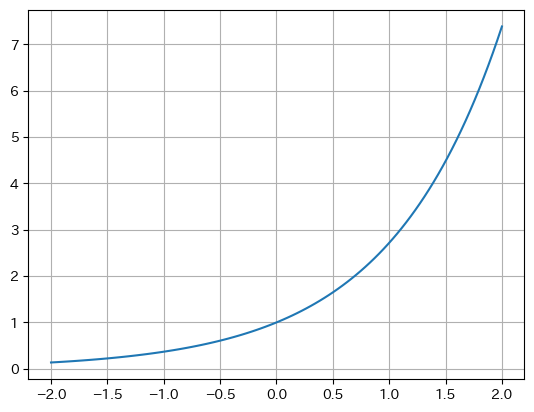

In [58]:
x = np.linspace(-2, 2, 100)
y = np.exp(x)
plt.plot(x, y)
plt.grid()

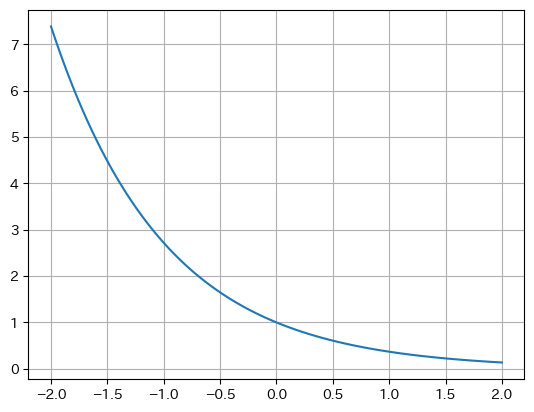

In [59]:
x = np.linspace(-2, 2, 100)
y = np.exp(-x)
plt.plot(x, y)
plt.grid()

対数`log` ： numpyは4つの関数を提供  

- 底を 2とする対数  
  例）2 を何乗したら 8 になるか → 対数 = 3  


In [60]:
np.log2(8)

3.0

- 底を 10とする対数   

In [61]:
np.log10(100)

2.0

- 底を e：ネイピア数とする対数  

In [62]:
a = np.array([1, 2, 3])
np.log(a)

array([0.        , 0.69314718, 1.09861229])

- 底を e：ネイピア数とするa+1の対数  

In [63]:
np.log1p(a)

array([0.69314718, 1.09861229, 1.38629436])


---

テストデータ  
- 説明変数 X：平均気温(抜粋)  
- 被説明変数 Y：支出額(抜粋)  

In [64]:
X = np.array([
        9.1, 11.2, 12.3, 18.9, 22.2, 26. , 30.9, 31.2, 28.8, 23. , 18.3, 11.1
    ])

Y = np.array([
        463.,  360.,  380.,  584.,  763.,  886., 1168., 1325.,  847., 542.,  441.,  499.
    ])


- 合計  

In [65]:
X.sum(), Y.sum()

(243.00000000000003, 8258.0)

- 平均  

In [66]:
X.mean(), Y.mean()

(20.250000000000004, 688.1666666666666)

- 中央値  

In [67]:
np.median(X), np.median(Y)

(20.549999999999997, 563.0)

- 四分位数  

In [68]:
np.percentile(X, 25), np.percentile(X, 50), np.percentile(X, 75)

(12.025, 20.549999999999997, 26.7)

In [69]:
np.percentile(Y, 25), np.percentile(Y, 50), np.percentile(Y, 75)

(457.5, 563.0, 856.75)

- 標準偏差  

In [70]:
X.std(), Y.std()

(7.68998266144556, 301.13862625412605)

- 分散  
  - 未指定 または `ddof=0`：標本分散 → 提示されたデータから、分散を「計算」 【通常はこちらを使用】  
  - `ddof=1`：不偏分散 → 提示されたデータから、母集団全体の分散を「推定」  

In [71]:
X.var(), Y.var()

(59.135833333333345, 90684.4722222222)

In [72]:
X.var(ddof=1), Y.var(ddof=1)

(64.51181818181819, 98928.51515151514)

- ルート(√, 平方根)  
  - 分散で二乗された数字を戻す  

In [73]:
np.sqrt(X.var()), np.sqrt(Y.var())

(7.68998266144556, 301.13862625412605)

- 共分散  
  標本分散の場合、`ddof=0`を指定すること → `var()`とデフォルト値が異なる  
  結果は以下のように格納される  
  - 1行1列目(0,0)：Xの分散 → 上記var計算結果と同じ  
  - 2行2列目(1,1)：Yの分散 → 上記var計算結果と同じ  
  - (0,1)と(1,0)：XとYの共分散、どちらも同じ値(どちらかを取得すれば良い)  

In [74]:
v = np.cov(X,Y,ddof=0)
v

array([[5.91358333e+01, 2.05058333e+03],
       [2.05058333e+03, 9.06844722e+04]])

In [75]:
xvar = v[0,0]
yvar = v[1,1]
xvar, yvar

(59.13583333333333, 90684.4722222222)

In [76]:
sxy = v[0, 1]
sxy

2050.5833333333335

In [77]:
sxy = v[1, 0]
sxy

2050.5833333333335


---

### 最小二乗法による回帰係数の計算  

#### 単回帰  
- 回帰直線：Y = aX + b  
- 傾き：a = x と y の共分散 / x の分散  
- 切片：b = Yの平均 - (a * Xの平均)  

In [78]:
a = sxy / xvar
xmean = X.mean()
ymean = Y.mean()
b = ymean - a * xmean
a, b

(34.67581697504334, -14.018627077961128)

- `numpy.polyfit()`：線形回帰モデルのパラメータ `a` , `b` を算出  
  - 回帰直線(単回帰)の場合：3番目の引数(次元数)に1を指定する  

In [79]:
W = np.polyfit(X, Y, 1)
W

array([ 34.67581698, -14.01862708])

- 値を検証  
  `assert_allclose()` ：値がほぼ同じ場合は何も表示しない、差がある場合は`AssertionError`  

In [80]:
np.testing.assert_allclose((a, b), (W[0], W[1]))

- AssertionErrorを発生させる場合は、コメントを外して実行  

In [81]:
#np.testing.assert_allclose((a, b), (35, W[1]))

- `numpy.polyval()`：回帰直線：Y = aX + bの`Y`を算出  

In [82]:
y_hat = np.polyval(W, X)
y_hat

array([ 301.53130739,  374.35052304,  412.49392172,  641.35431375,
        755.78450977,  887.55261427, 1057.46411745, 1067.86686254,
        984.6449018 ,  783.52516335,  620.54882357,  370.88294135])


---

#### 行列演算で単回帰分析  

- y = ax + b をベクトルで表す  

$$
\begin{align}
\pmb{x} = \begin{pmatrix}
x \\ 1
\end{pmatrix},
\pmb{w} = \begin{pmatrix}
a \\ b
\end{pmatrix}
\end{align}
$$


\begin{align}
\hat{y} = \pmb{x}^\top\pmb{w}
\end{align}



\begin{align}
\hat{y} = xa + b = ax + b
\end{align}


- 目的関数：計算結果が最小値となる$\pmb{w}$を求める  
    → 最終的に0へ近づける  

\begin{align}
\hat{L}_{\mathcal{D}}(\pmb{w}) = \|\pmb{y} - \pmb{\hat{y}}\|^2 = \|\pmb{y} - \pmb{X} \pmb{w}\|^2
\end{align}


- 目的関数を最小化する、ベクトル$\pmb{w}$の求め方  

$$
\begin{align}
\pmb{w} &= (\pmb{X}^\top \pmb{X})^{-1}\pmb{X}^\top \pmb{y}
\end{align}
$$



- `numpy.linalg.inv()`：逆行列 (行列$^{-1}$)  


In [83]:
X_V = np.vstack([ X, np.ones_like(X) ]).T
X_V

array([[ 9.1,  1. ],
       [11.2,  1. ],
       [12.3,  1. ],
       [18.9,  1. ],
       [22.2,  1. ],
       [26. ,  1. ],
       [30.9,  1. ],
       [31.2,  1. ],
       [28.8,  1. ],
       [23. ,  1. ],
       [18.3,  1. ],
       [11.1,  1. ]])

In [84]:
w = np.linalg.inv(X_V.T @ X_V) @ X_V.T @ Y
w

array([ 34.67581698, -14.01862708])

- x = 20 の場合  

In [85]:
y_hat_V = np.polyval(w, 20)
y_hat_V

679.4977124229072

In [86]:
np.polyval(w, 1)

20.65718989708374

In [87]:
np.polyval(w, 2)

55.33300687212707


---

#### 対数で単回帰分析  

- X, Y を対数に変換  


In [88]:
X_log = np.vstack([ np.log(X), np.ones_like(X) ]).T
X_log

array([[2.20827441, 1.        ],
       [2.41591378, 1.        ],
       [2.50959926, 1.        ],
       [2.93916192, 1.        ],
       [3.10009229, 1.        ],
       [3.25809654, 1.        ],
       [3.43075618, 1.        ],
       [3.44041809, 1.        ],
       [3.36037539, 1.        ],
       [3.13549422, 1.        ],
       [2.90690106, 1.        ],
       [2.40694511, 1.        ]])

In [89]:
Y_log = np.log(Y)
Y_log

array([6.13772705, 5.88610403, 5.94017125, 6.36990098, 6.63725803,
       6.78671695, 7.06304816, 7.18916774, 6.74170069, 6.295266  ,
       6.08904488, 6.2126061 ])

In [90]:
w = np.linalg.inv(X_log.T @ X_log) @ X_log.T @ Y_log
w

array([0.84382421, 3.97669437])

- x = 20 の場合  

In [91]:
y_hat_log = np.polyval(w, 20)
y_hat_log

20.853178518101537

- 対数変換を「しない」「する」で分析結果が異なる  
  - しない：直線関係のモデル → x が増減した量に比例して y の量も増減する  
  - する：弾力性が一定のモデル → x の変化率に比例して y の変化率も増減する  
    例）所得 x が 1％ 増えたら需要 y が 0.8% 増える場合、需要の所得弾力性は 0.8 となる  
- 経済学や自然科学の世界では「所得が１%増えるたびに需要は〇%増える」のように、弾力性が一定と考えられるものが多く存在することから、対数変換をしてから最小二乗法を使う方法がよく使われている  
- 参考：[「対数変換を行う意味について。回帰分析において対数変換する背景にある前提とは？」](https://atarimae.biz/archives/13161)  

In [92]:
y_hat_V - y_hat_log

658.6445339048056

In [93]:
np.polyval(w, 1)

4.820518579352204

In [94]:
np.polyval(w, 2)

5.6643427866548


---

#### 多項式回帰  

- 3次曲線：y = b0 + (b1 * x) + (b2 * x^2) + (b3 * x^3)  


テストデータ  


In [95]:
D = np.array([[1, 3], [3, 6], [6, 5], [8, 7]])
X = D[:,0]
Y = D[:,1]
X, Y

(array([1, 3, 6, 8]), array([3, 6, 5, 7]))

フィッティング  
- 3次曲線：3番目の引数(次元数)に3を指定する  
- 結果は b3, b2, b1, b0 の順番で返却される  

In [96]:
W = np.polyfit(X, Y, 3)
W

array([ 0.09047619, -1.27142857,  5.40952381, -1.22857143])


---
